In [59]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

## Project Overall Problem Statement

There are many stakeholders in this market. Buyers and sellers want to find good prices, so they need to understand what affects the value of a car. <br>
The goal of this task is to predict the resale price of a car based on its properties (e.g., make, model, mileage, age, power, etc). <br>
Besides to prediction outcome in terms of a dollar value, other useful results include the importance of different attributes, 

In [77]:
dataset_path = Path("/Users/melloo21/Desktop/NUS Items/CS5228/Project/CS5228_project/dataset")
train_dataset = f"{dataset_path}/train.csv"
test_dataset = f"{dataset_path}/test.csv"

# READ
train_df = pd.read_csv(train_dataset)
test_df = pd.read_csv(test_dataset)

In [107]:
train["make_model"] = train["make"] + train["model"]

In [120]:
any(train[train.make_model ==  "morrisminor"].curb_weight)

True

In [150]:
train.make_model.nunique()

809

In [148]:
for elem in train[train.fuel_type.isna()].make_model.unique():
    print(any(train[train.make_model ==  elem].fuel_type))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

In [122]:
for elem in train[train.curb_weight.isna()].make_model.unique():
    print(any(train[train.make_model ==  elem].power))

True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [78]:
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         10000 non-null  int64  
 1   title              10000 non-null  object 
 2   make               9459 non-null   object 
 3   model              10000 non-null  object 
 4   description        9732 non-null   object 
 5   manufactured       9997 non-null   float64
 6   original_reg_date  97 non-null     object 
 7   reg_date           10000 non-null  object 
 8   type_of_vehicle    10000 non-null  object 
 9   category           10000 non-null  object 
 10  transmission       10000 non-null  object 
 11  curb_weight        9890 non-null   float64
 12  power              8914 non-null   float64
 13  fuel_type          2350 non-null   object 
 14  engine_cap         9765 non-null   float64
 15  no_of_owners       9992 non-null   float64
 16  depreciation       9799

None

In [3]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         25000 non-null  int64  
 1   title              25000 non-null  object 
 2   make               23684 non-null  object 
 3   model              25000 non-null  object 
 4   description        24320 non-null  object 
 5   manufactured       24993 non-null  float64
 6   original_reg_date  255 non-null    object 
 7   reg_date           25000 non-null  object 
 8   type_of_vehicle    25000 non-null  object 
 9   category           25000 non-null  object 
 10  transmission       25000 non-null  object 
 11  curb_weight        24693 non-null  float64
 12  power              22360 non-null  float64
 13  fuel_type          5879 non-null   object 
 14  engine_cap         24404 non-null  float64
 15  no_of_owners       24982 non-null  float64
 16  depreciation       244

None

In [132]:
train_df[~train_df["original_reg_date"].isna()][["original_reg_date","reg_date"]]


,original_reg_date,reg_date
22,01-jan-1981,12-nov-2022
36,23-jun-2020,07-jun-2023
37,30-sep-2014,28-sep-2017
43,31-oct-2019,28-oct-2022
100,22-may-2018,30-apr-2021
...,...,...
24683,25-oct-2019,15-nov-2021
24786,28-oct-2016,20-dec-2018
24868,06-jun-2007,02-mar-2010
24927,12-jun-2009,26-aug-2009


In [6]:
# dereg_value -- deregistration value in SGD one will get back from govt 
# mileage -- number of kilometers driven
# omv -- Open market value in SGD assessed by the singapore customs
# lifespan -- Date stated on lifespan marks the day that the vehicle must be deregistered
# Eco category -- ECO CAT of vehicle
# OPC Scheme -- off peak car scheme

train_df[["dereg_value","mileage","omv","opc_scheme","lifespan","eco_category"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dereg_value   24780 non-null  float64
 1   mileage       19696 non-null  float64
 2   omv           24936 non-null  float64
 3   opc_scheme    162 non-null    object 
 4   lifespan      2329 non-null   object 
 5   eco_category  25000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


## Numerical Analysis

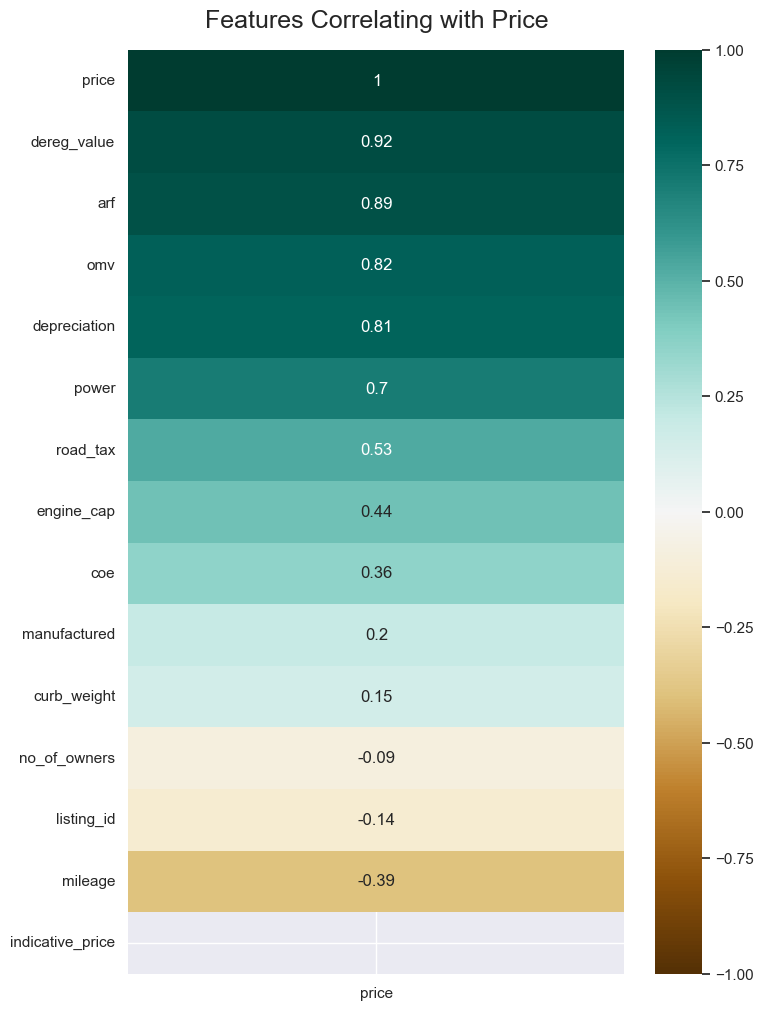

In [66]:
# Just Price Relations
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train_df[numeric_columns].corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16)

In [139]:
import datetime as dt
train_df['reg_date_dt'] = train_df['reg_date'].apply(lambda x: dt.datetime.strptime(x, "%d-%b-%Y"))
train_df['reg_date_year'] = train_df['reg_date_dt'].apply(lambda x:x.year)

In [147]:
fig = px.scatter(train_df[train_df.type_of_vehicle != "sports car"], x="reg_date_year", y="mileage",trendline="ols", color="type_of_vehicle")
fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [76]:
## Imputation methods
# Iterative Imputer, Simple Imputer -- Mean/Median etc -- not v good, Interpolation, KNN
## To mark imputed values

# Models that can handle NaN
# BaggingRegressor , DecisionTreeRegressor , HistGradientBoostingRegressor , RandomForestRegressor, StackingRegressor, VotingRegressor

In [74]:
train_df[train_df.dereg_value.isna()]

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
36,1220223,BMW 8 Series 840i Gran Coupe M-Sport,bmw,840i,142816,2020.0,23-jun-2020,07-jun-2023,luxury sedan,"imported used vehicle, parf car",...,17000.0,82130.0,142816.0,NaN,NaN,uncategorized,bmw 6 cylinder b58 inline twinpower turbocharg...,"m-sports plus package, harmon kardon surround ...",NaN,358800.0
37,1316595,Mercedes-Benz CLA-Class CLA250 AMG Line,mercedes-benz,amg,"consignment unit, good condition, good for coe...",2014.0,30-sep-2014,28-sep-2017,luxury sedan,"imported used vehicle, parf car",...,NaN,12360.0,12360.0,NaN,NaN,uncategorized,4 cylinders inline turbocharged 7g-dct auto tr...,"sports rims, electric memory seats, auto headl...",NaN,72333.0
43,1278703,BMW M4 Coupe,bmw,m4,"only 1 owner, warranty and free servicing pack...",2019.0,31-oct-2019,28-oct-2022,sports car,"imported used vehicle, parf car",...,38000.0,46215.0,56701.0,NaN,NaN,uncategorized,extremely powerful 3.0l inline 6 cylinder m tw...,"fully stock, gps navigation, keyless entry, st...",NaN,260800.0
100,1228430,Rolls-Royce Wraith 6.6A,rolls-royce,wraith,the 2018 rolls-royce wraith onyx edition is a ...,2018.0,22-may-2018,30-apr-2021,sports car,"imported used vehicle, parf car, rare & exotic...",...,8000.0,333792.0,572826.0,NaN,NaN,uncategorized,powerful 6.6l v12 twin turbo charged engine pr...,"rr monogram to all headrest, comfort entry sys...",NaN,1280000.0
155,1189294,Isuzu FTR34P (COE till 03/2028),isuzu,ftr34p,only isuzu crane unit in the market! attached ...,2008.0,NaN,10-apr-2008,truck,"coe car, premium ad car",...,NaN,51527.0,2577.0,NaN,09-apr-2028,uncategorized,NaN,NaN,NaN,69800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24308,1155191,Toyota Rav4 2.4A X (COE till 10/2028),toyota,rav4,1 owner transfer unit.confirm love at first si...,2008.0,NaN,10-oct-2008,suv,"coe car, low mileage car",...,141221.0,20105.0,20105.0,NaN,NaN,uncategorized,powerful and fuel efficient 2.4l dohc 16v vvt-...,"sports rims, leather seats, touchscreen audio ...",NaN,56800.0
24406,1258850,BMW M4 Coupe Competition Package,bmw,m4,kw suspension. suvneer front lip. carbon hood ...,2021.0,05-may-2021,22-dec-2022,sports car,"imported used vehicle, parf car, rare & exotic",...,30000.0,36574.0,43204.0,NaN,NaN,uncategorized,view specs of the bmw m4,NaN,NaN,438888.0
24534,1276317,Toyota Alphard 2.5A S C-Package Moonroof,NaN,alphard,0,2021.0,30-jun-2021,27-feb-2024,mpv,"imported used vehicle, parf car, almost new ca...",...,4200.0,22790.0,23906.0,NaN,NaN,uncategorized,"2.5l inline 4 cylinders dohc engine, cvt-i tra...","original factory 18"" sports rims, in-car front...",NaN,258000.0
24683,1190945,Lexus LX570,lexus,lx570,rare 7 seater. only one in the market. in imma...,2019.0,25-oct-2019,15-nov-2021,luxury sedan,"imported used vehicle, parf car",...,NaN,87678.0,129821.0,NaN,NaN,uncategorized,NaN,NaN,NaN,400000.0


In [ ]:
array([nan, 'revised opc scheme . learn more about opc schemes.',
       'old opc scheme . learn more about opc schemes.', '1100'],
      dtype=object)

## Categorical/Textual Features

In [35]:
feature_name = "opc_scheme"
print(f" Number of unique {feature_name} {train_df[feature_name].nunique()}, type of unique {train_df[feature_name].unique()}")

 Number of unique opc_scheme 3, type of unique [nan 'revised opc scheme . learn more about opc schemes.'
 'old opc scheme . learn more about opc schemes.' '1100']


In [36]:
feature_name = "eco_category"
print(f" Number of unique {feature_name} {train_df[feature_name].nunique()}, type of unique {train_df[feature_name].unique()}")

 Number of unique eco_category 1, type of unique ['uncategorized']


In [7]:
train_df[train_df.opc_scheme == "revised opc scheme . learn more about opc schemes."].category

21                                       opc car, parf car
185      opc car, parf car, premium ad car, low mileage...
256      opc car, parf car, premium ad car, sgcarmart w...
417      opc car, parf car, premium ad car, low mileage...
422      opc car, parf car, premium ad car, low mileage...
                               ...                        
24299                                    opc car, parf car
24319                   opc car, parf car, low mileage car
24337    opc car, parf car, premium ad car, low mileage...
24560    opc car, parf car, direct owner sale, low mile...
24617                    opc car, parf car, premium ad car
Name: category, Length: 155, dtype: object

In [28]:
feature_name = "model"
print(f" Number of unique {feature_name} {train_df[feature_name].nunique()}, type of unique {train_df[feature_name].unique()}")

 Number of unique model 799, type of unique ['range' 'c200' 'odyssey' 'altis' 'gs' 's2000' 'huracan' 'avante'
 'evolution' 'c180' 'impreza' 'canter' 'e200' '318i' 'q3' 'vios'
 'outlander' '3' 'civic' '630ci' '2' '504' 'noah' 'golf' 'elantra' 'e'
 'stream' 'arteon' 'continental' '430i' 'e230' 'cr-v' 'glc250' 'shuttle'
 '840i' 'amg' '216i' 'city' 'actyon' 'cyz52k' 'm4' 'q2' 'v40' 'asx'
 'cabstar' 'harrier' 'cerato' 'i-pace' 'estima' 'qashqai' 'cooper' 'hiace'
 'f' 'rx' 'stonic' 'leon' 'i30' 'nv350' 'x4' 'note' 'rush' 'es' 'glc200'
 'partner' 'vezel' 'fit' '420i' 'passat' 'r8' 'a1' 'e-dispatch' 'q5'
 'alphard' '328' 'accent' 'macan' 'getz' 'model' 's60' 'wraith' 'cayenne'
 'discovery' 'every' 'attrage' 'lancer' 'forester' 'spacia' 'n-van'
 'cla180' 'x3' 'gla180' 'a200' 'citan' 'cx-3' 'a3' 'fvr34' 'seltos' 's90'
 'jazz' 'm3' '523i' 'freed' 'c4' 'wish' 'q60' 'x1' '228i' 's320l' 'a6'
 'vellfire' 'ftr34p' 'c160' 'm2' '730i' 'orlando' '5008' '630i' 'previa'
 'yaris' 'corolla' 'xe' '535i' 'acco

In [29]:
feature_name = "fuel_type"
print(f" Number of unique {feature_name} {train_df[feature_name].nunique()}, type of unique {train_df[feature_name].unique()}")

 Number of unique fuel_type 5, type of unique [nan 'diesel' 'petrol-electric' 'electric' 'petrol' 'diesel-electric']


In [30]:
feature_name = "make"
print(f" Number of unique {feature_name} {train_df[feature_name].nunique()}, type of unique {train_df[feature_name].unique()}")

 Number of unique make 95, type of unique ['land rover' 'mercedes-benz' 'honda' 'toyota' 'lexus' 'lamborghini'
 'hyundai' 'mitsubishi' 'subaru' 'bmw' 'audi' 'mazda' nan 'peugeot'
 'volkswagen' 'bentley' 'ssangyong' 'isuzu' 'volvo' 'nissan' 'kia'
 'jaguar' 'mg' 'seat' 'mini' 'citroen' 'ferrari' 'porsche' 'tesla'
 'rolls-royce' 'suzuki' 'infiniti' 'chevrolet' 'opel' 'renault' 'mclaren'
 'morris' 'byd' 'fiat' 'iveco' 'skoda' 'maserati' 'dfsk' 'perodua' 'hino'
 'daihatsu' 'maxus' 'jeep' 'ford' 'shineray' 'morgan' 'scania'
 'aston martin' 'polestar' 'ud' 'sunbeam' 'higer' 'sokon' 'austin' 'lotus'
 'alpine' 'foton' 'ds' 'alfa romeo' 'proton' 'ora' 'international'
 'golden dragon' 'daimler' 'king long' 'triumph' 'yutong' 'dodge' 'srm'
 'man' 'cupra' 'saab' 'camc' 'smart' 'hummer' 'rover' 'datsun' 'chrysler'
 'mitsuoka' 'ruf' 'kyc' 'sc' 'range' 'cadillac' 'bertone' 'valiant' 'aion'
 'joylong' 'sinotruk' 'pontiac' 'td']


In [31]:
feature_name = "title"
print(f" Number of unique {feature_name} {train_df[feature_name].nunique()}, type of unique {train_df[feature_name].unique()}")

 Number of unique title 7263, type of unique ['Land Rover Range Rover Velar 3.0A Si6 R-Dynamic Sunroof'
 'Mercedes-Benz C-Class C200 Sport Premium Sunroof'
 'Honda Odyssey 2.4A (COE till 09/2027)' ...
 'Mercedes-Benz E-Class E300e Plug-in Hybrid AMG Line'
 'Mazda CX-9 2.5A Turbo Luxury' 'BMW X7 xDrive40i 7-Seater']


In [32]:
feature_name = "transmission"
print(f" Number of unique {feature_name} {train_df[feature_name].nunique()}, type of unique {train_df[feature_name].unique()}")

 Number of unique transmission 2, type of unique ['auto' 'manual']


In [33]:
feature_name = "type_of_vehicle"
print(f" Number of unique {feature_name} {train_df[feature_name].nunique()}, type of unique {train_df[feature_name].unique()}")

 Number of unique type_of_vehicle 11, type of unique ['suv' 'luxury sedan' 'mpv' 'mid-sized sedan' 'sports car' 'truck'
 'hatchback' 'stationwagon' 'bus/mini bus' 'van' 'others']


In [152]:
feature_name = "lifespan"
print(f" Number of unique {feature_name} {train_df[feature_name].nunique()}, type of unique {train_df[feature_name].unique()}")

 Number of unique lifespan 1482, type of unique [nan '30-may-2039' '11-aug-2031' ... '06-apr-2036' '16-mar-2037'
 '23-dec-2040']


In [34]:
# All categories -- get all delimitted items
large_string = ', '.join(str(item) for item in train_df.category.dropna())
listed_Categories = set(large_string.split(","))
print(f" Numeber of categories {len(listed_Categories)} {listed_Categories}")

 Numeber of categories 17 {' imported used vehicle', ' opc car', ' -', ' coe car', ' consignment car', ' sta evaluated car', ' vintage cars', ' almost new car', ' hybrid cars', ' electric cars', ' rare & exotic', ' direct owner sale', ' low mileage car', ' premium ad car', ' parf car', ' sgcarmart warranty cars', 'parf car'}


## Analyzing Feature Relation

<Axes: xlabel='omv', ylabel='price'>

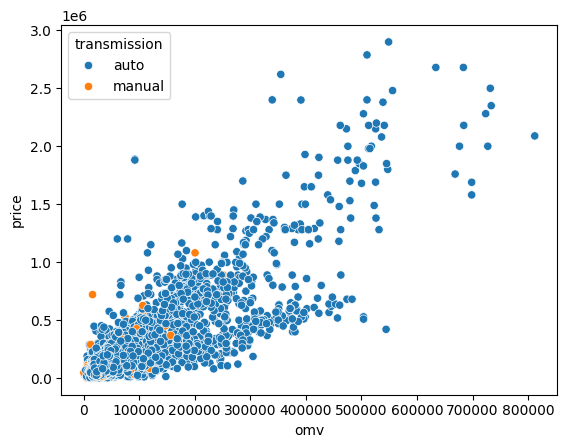

In [41]:
sns.scatterplot(data=train_df, x="omv", y="price", hue="transmission")


<Axes: xlabel='type_of_vehicle', ylabel='count'>

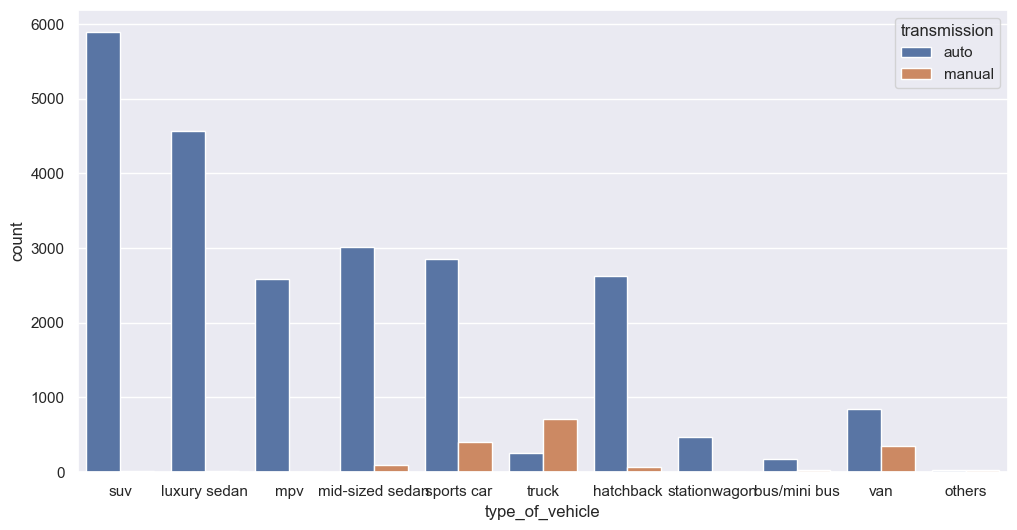

In [49]:
sns.set_theme(rc={'figure.figsize':(12,6)})
sns.countplot(train_df,x="type_of_vehicle", hue="transmission")

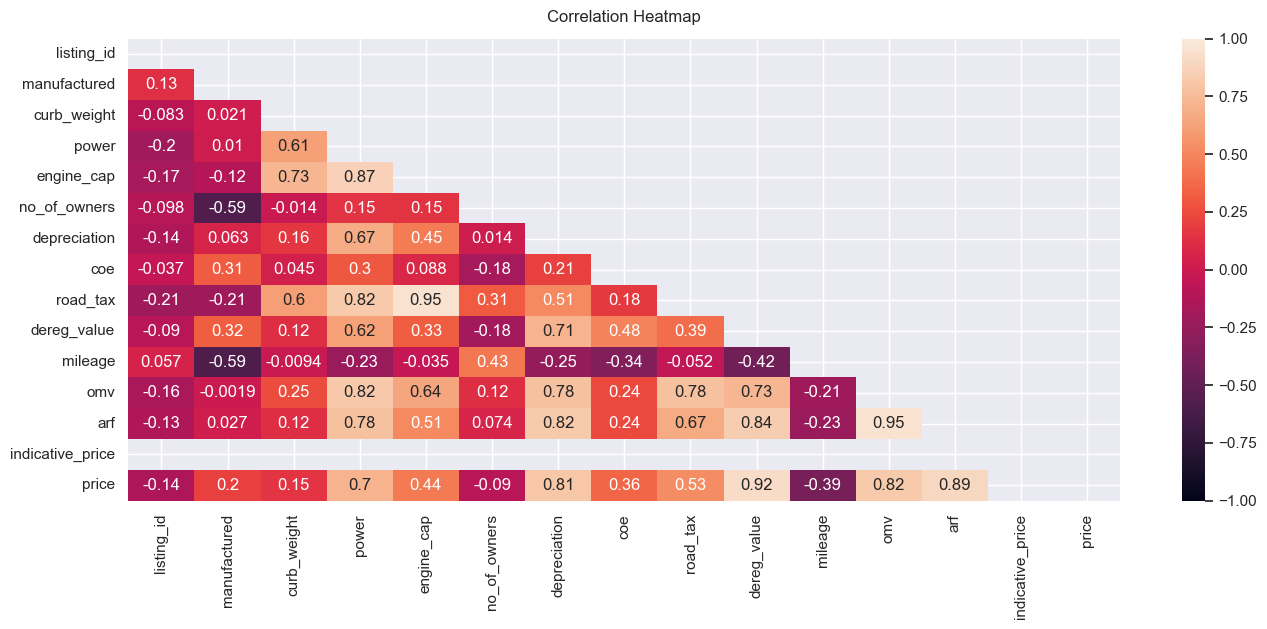

In [67]:
numeric_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

corr_df = train_df[numeric_columns].corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
heatmap = sns.heatmap(corr_df, mask=mask, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Analyzing Train and Test Set Relation

In [86]:
train = train_df.copy()
test = test_df.copy()

train["set"] = "train"
test["set"] = "test"
all_data = pd.concat([train,test],axis=0).reset_index(drop=True)

In [88]:
len(numeric_columns)

15

ValueError: `dataset` input should have multiple elements.

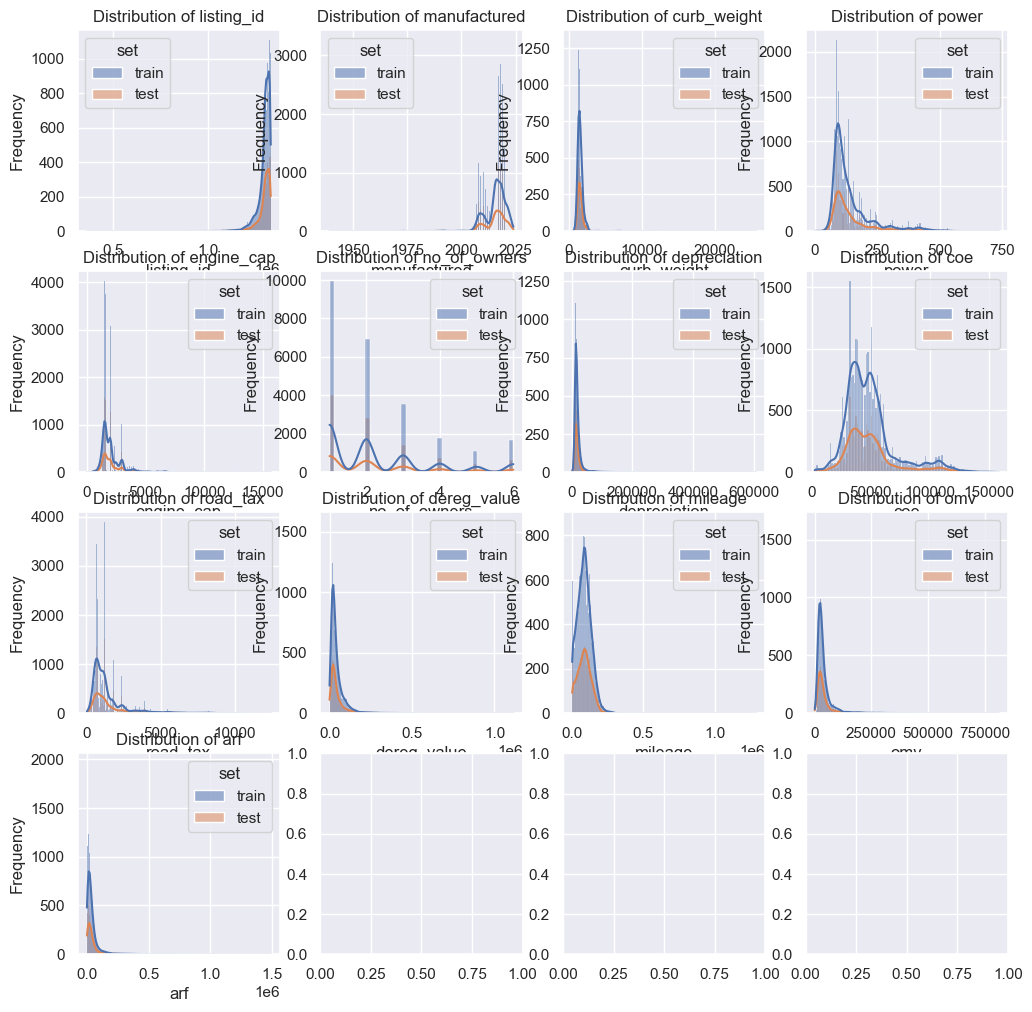

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Iterate over the numeric columns and create distribution plots
for i, column in enumerate(numeric_columns):
    sns.histplot(data=all_data, x=column, hue="set", kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {column}', fontsize=12)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(numeric_columns), len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [154]:
np.log(all_data.arf)

0        132031.0
1         43950.0
2         30794.0
3         16084.0
4         55456.0
           ...   
34995     19388.0
34996     39722.0
34997     42233.0
34998     14799.0
34999     21692.0
Name: arf, Length: 35000, dtype: float64

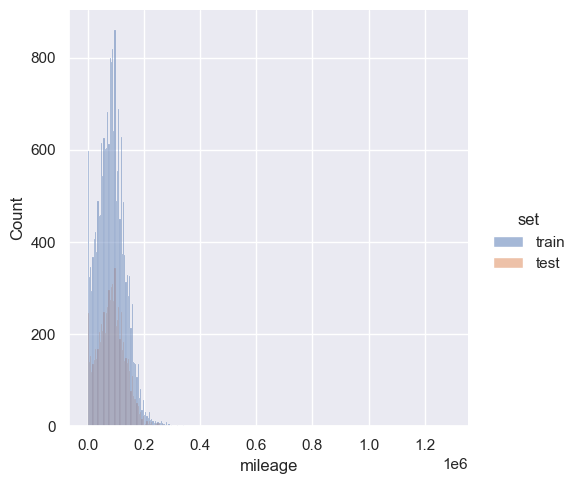

In [87]:
sns.displot(all_data, x="mileage", hue="set")

## Processing Text

In [97]:
train_df["description"][0]

'1 owner, no repairs needed! it looks great, inside and out. it offers good comfort for four adults and decent cargo space. call us for viewing now to avoid disappointment!'

In [98]:
train_df["description"][1]

'rare beautiful white c200 sport premium sunroof in the market. low mileage driven. most popular sedan in the market. in pristine condition. quiet and comfortable cabin to travel in top notch comfort, luxurious and superb efficient drive. smooth acceleration and powerful engine. easy and low cost maintenance. high loan financing available. high trade in offer. call now for a viewing appointment.'

In [100]:
train_df["features"][0]

'3l supercharged v6 p380 engine at 375bhp/450nm torque, 8 speed zf, bsm, lane departure warning/lane keep assist, adaptive cruise control, hud.'

In [101]:
train_df["features"][1]

'2.0l 4 cylinders inline turbocharged engine, paddle shifters, abs, esp, 8 x srs airbags, agility select, auto start/stop function, cruise control. view specs of the mercedes-benz c-class saloon'

In [102]:
train_df["accessories"][0]

'2 x massage/memory/cooling & warmer seat, rear electric seat, panoramic roof, meridian surround, virtual cockpit, carplay, 360 cam, auto/kick tailgate'